# Heart Disease Prediction 

# 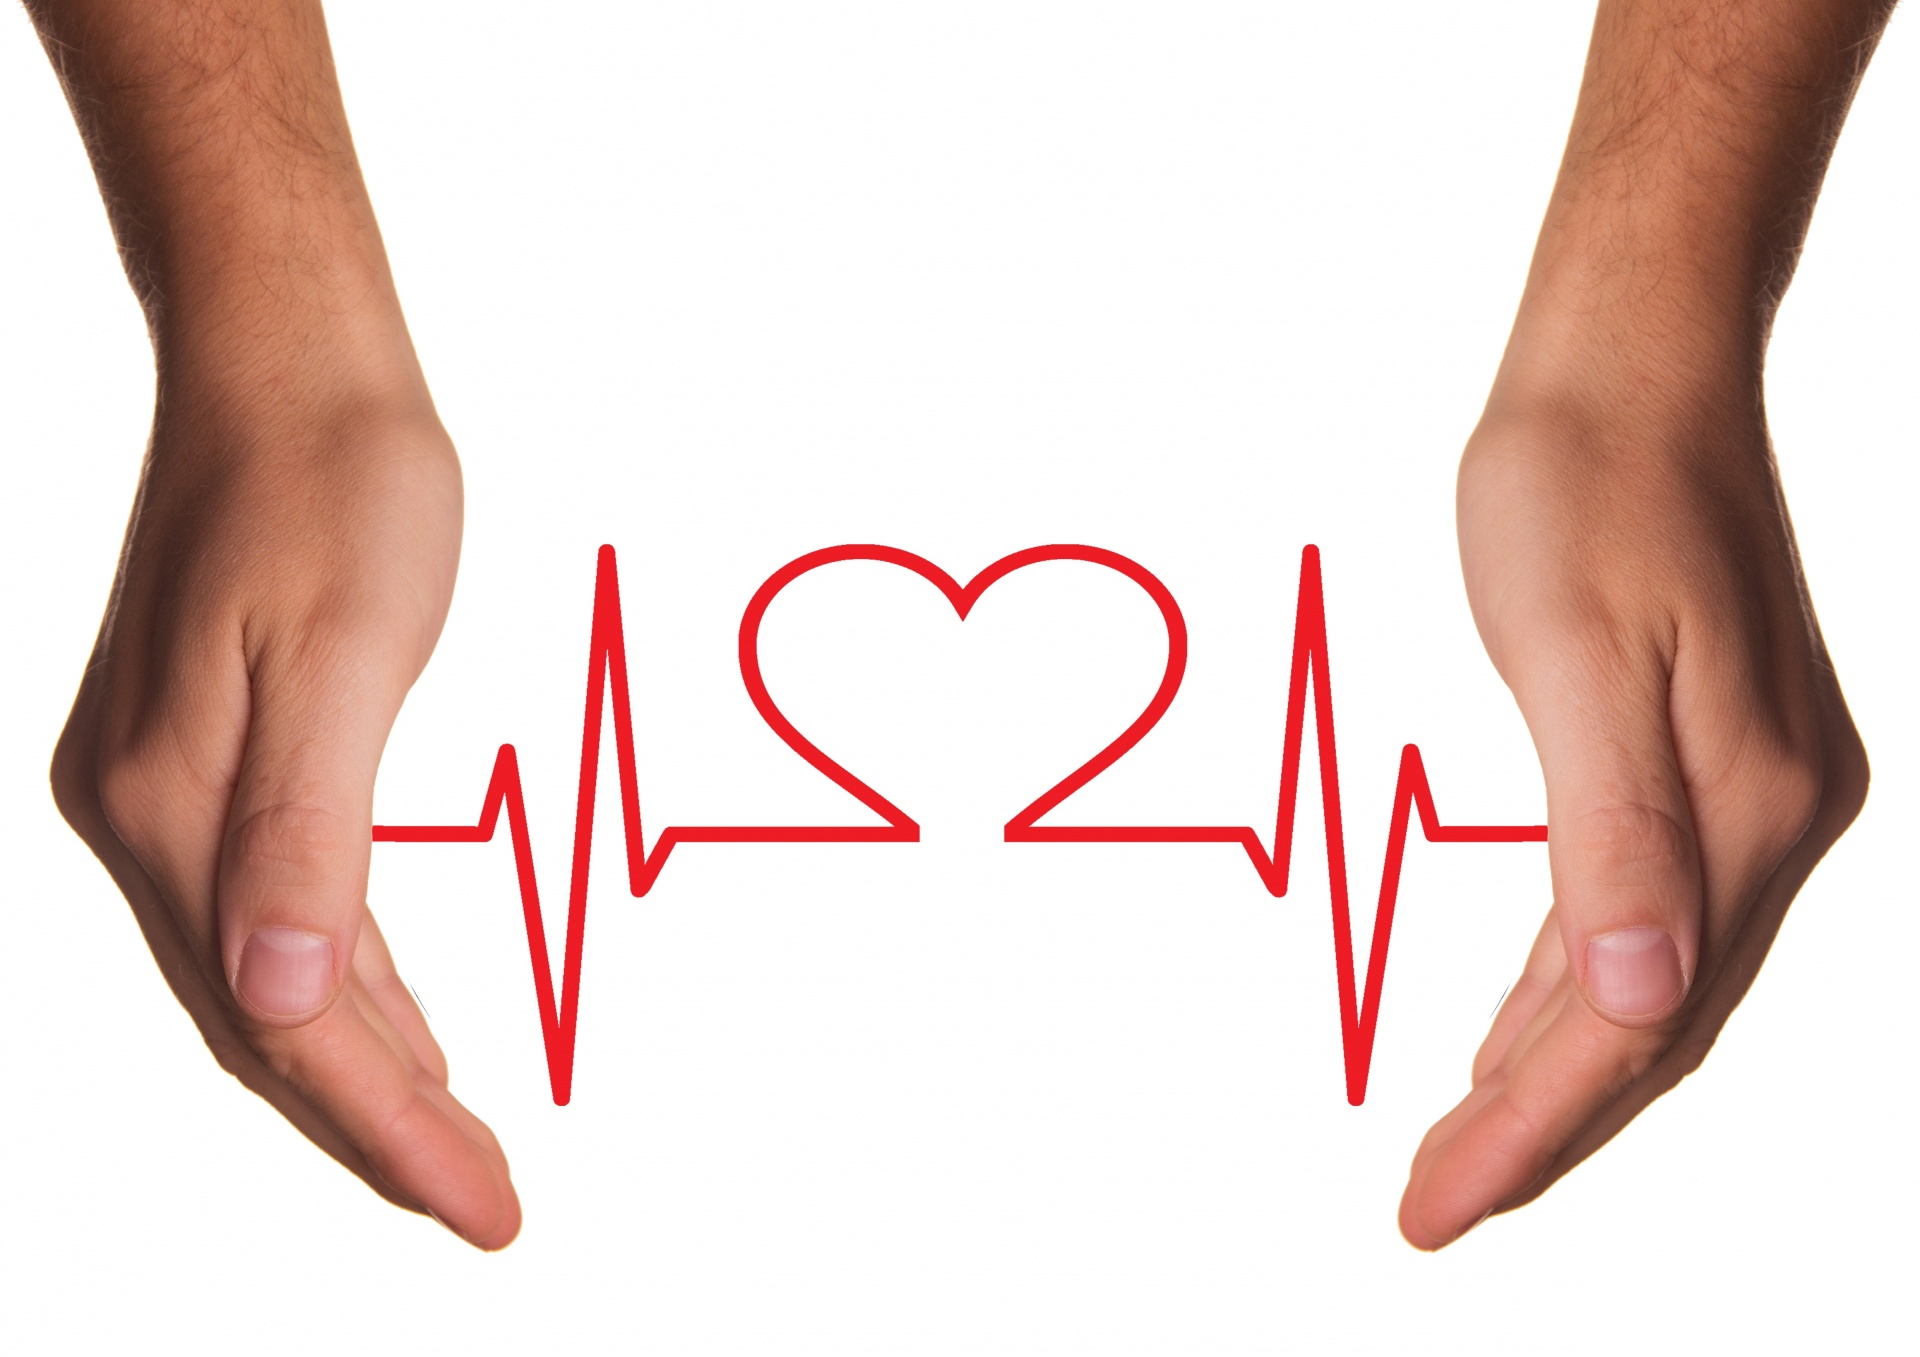

# Project Aim and Objective 

1. The objective of this machine learning (ML) project is to develop a predictive model for heart disease based on a patient's health and demographic features.
2. The model will utilize historical data of patients diagnosed with heart disease to learn patterns and relationships between the features and the disease outcome.
3. The primary goal of this project is to improve the diagnosis and treatment of heart disease by providing doctors and healthcare professionals with a reliable and accurate tool for predicting the disease outcome.

## About Dataset
Context
This data set dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V. It contains 76 attributes, including the predicted attribute, but all published experiments refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

Content
#1.Attribute Information: 
#2.age
#3.sex
#4.chest pain type (4 values)
#5.resting blood pressure
#6.serum cholestoral in mg/dl
#7.fasting blood sugar > 120 mg/dl
#8.resting electrocardiographic results (values 0,1,2)
#9.maximum heart rate achieved
#10.exercise induced angina
#11.oldpeak = ST depression induced by exercise relative to rest
#12.the slope of the peak exercise ST segment
#13.number of major vessels (0-3) colored by flourosopy
#14.thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

# Importing Libraries 

In [1]:
# Dataset
import pandas as pd
import numpy as np
#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
# data preprocessing
from sklearn.preprocessing import StandardScaler
# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from xgboost import XGBClassifier
# loading model
import pickle

In [2]:
# ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [3]:
# loading the csv data to a Pandas DataFrame
df = pd.read_csv('../dataset/heart.csv')

# Exploratory Data Analysis 

In [4]:
# Sample Data 
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
print ('*'*10,'Dataset Information','*'*10)
print(df.info())

********** Dataset Information **********
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None


In [6]:
#Generating descriptive statistics.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1025.0,54.434146,9.072290,29.0,48.0,56.0,61.0,77.0
sex,1025.0,0.695610,0.460373,0.0,0.0,1.0,1.0,1.0
cp,1025.0,0.942439,1.029641,0.0,0.0,1.0,2.0,3.0
trestbps,1025.0,131.611707,17.516718,94.0,120.0,130.0,140.0,200.0
chol,1025.0,246.000000,51.592510,126.0,211.0,240.0,275.0,564.0
fbs,1025.0,0.149268,0.356527,0.0,0.0,0.0,0.0,1.0
restecg,1025.0,0.529756,0.527878,0.0,0.0,1.0,1.0,2.0
thalach,1025.0,149.114146,23.005724,71.0,132.0,152.0,166.0,202.0
exang,1025.0,0.336585,0.472772,0.0,0.0,0.0,1.0,1.0
oldpeak,1025.0,1.071512,1.175053,0.0,0.0,0.8,1.8,6.2


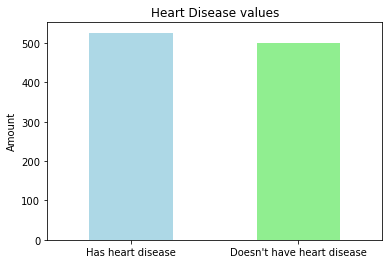

In [7]:
#plotting bar chart.
fig = df.target.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen'])
fig.set_xticklabels(labels=['Has heart disease', "Doesn't have heart disease"], rotation=0);
plt.title("Heart Disease values")
plt.ylabel("Amount");

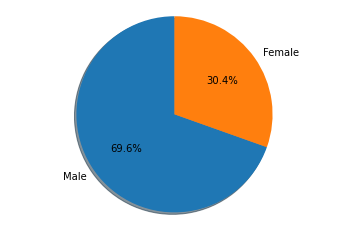

In [8]:
#visualizing in Pie chart
labels = 'Male', 'Female'
explode = (0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(df.sex.value_counts(), explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

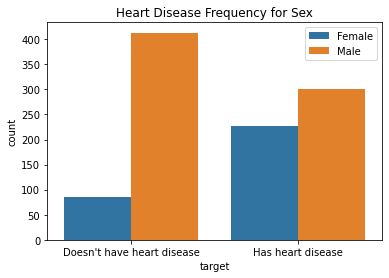

In [9]:
fig = sns.countplot(x = 'target', data = df, hue = 'sex')
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0)
plt.legend(['Female', 'Male'])
plt.title("Heart Disease Frequency for Sex");

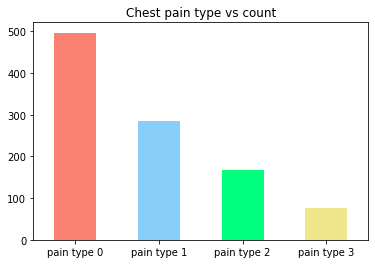

In [10]:
#plotting a bar chart
fig = df.cp.value_counts().plot(kind = 'bar', color = ['salmon', 'lightskyblue', 'springgreen', 'khaki'])
fig.set_xticklabels(labels=['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3'], rotation=0)

plt.title('Chest pain type vs count');

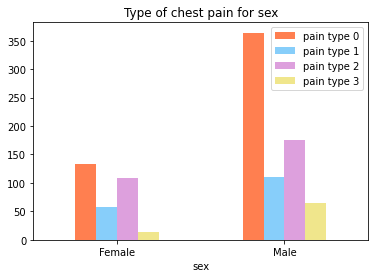

In [11]:
fig = pd.crosstab(df.sex, df.cp).plot(kind = 'bar', color = ['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of chest pain for sex')
fig.set_xticklabels(labels=['Female', 'Male'], rotation=0)
plt.legend(['pain type 0', 'pain type 1', 'pain type 2', 'pain type 3']);

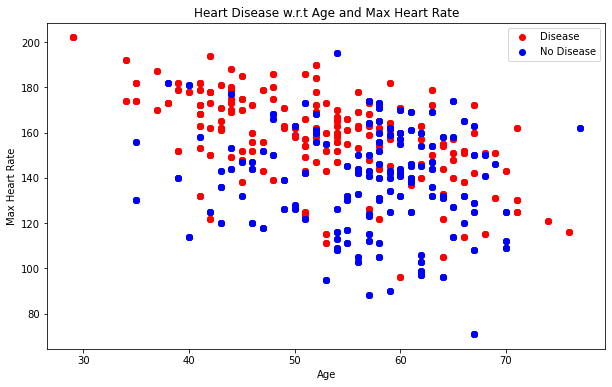

In [12]:
# Creating a figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.thalach[df.target==1], 
            c="red")

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.thalach[df.target==0], 
            c="blue")

# Addind info
plt.title("Heart Disease w.r.t Age and Max Heart Rate")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Max Heart Rate");

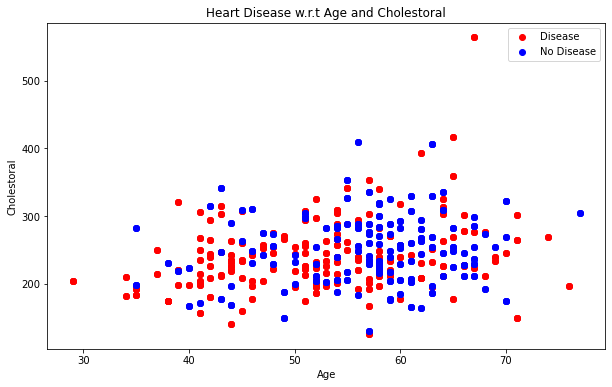

In [13]:
# Creating another figure
plt.figure(figsize=(10,6))

#plotting the values for people who have heart disease
plt.scatter(df.age[df.target==1], 
            df.chol[df.target==1], 
            c="red") # define it as a scatter figure

#plotting the values for people who doesn't have heart disease
plt.scatter(df.age[df.target==0], 
            df.chol[df.target==0], 
            c="blue") # axis always come as (x, y)

# Add some helpful info
plt.title("Heart Disease w.r.t Age and Cholestoral")
plt.xlabel("Age")
plt.legend(["Disease", "No Disease"])
plt.ylabel("Cholestoral");

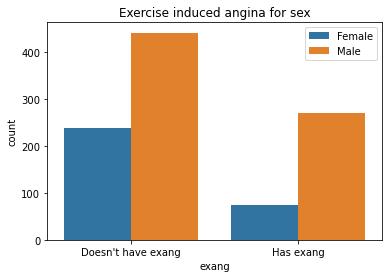

In [14]:
fig = sns.countplot(x = 'exang', data = df, hue = 'sex')
plt.title('Exercise induced angina for sex')
fig.set_xticklabels(labels=["Doesn't have exang", 'Has exang'], rotation=0)
plt.legend(['Female', 'Male']);

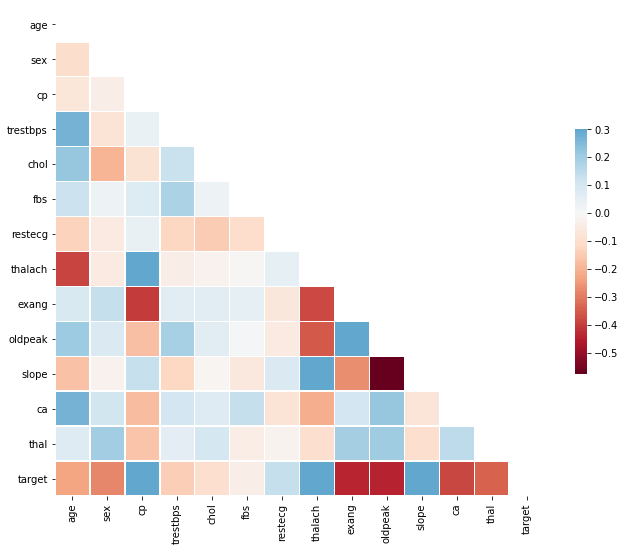

In [15]:
# Correleation between Attributes
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = "RdBu"
#sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

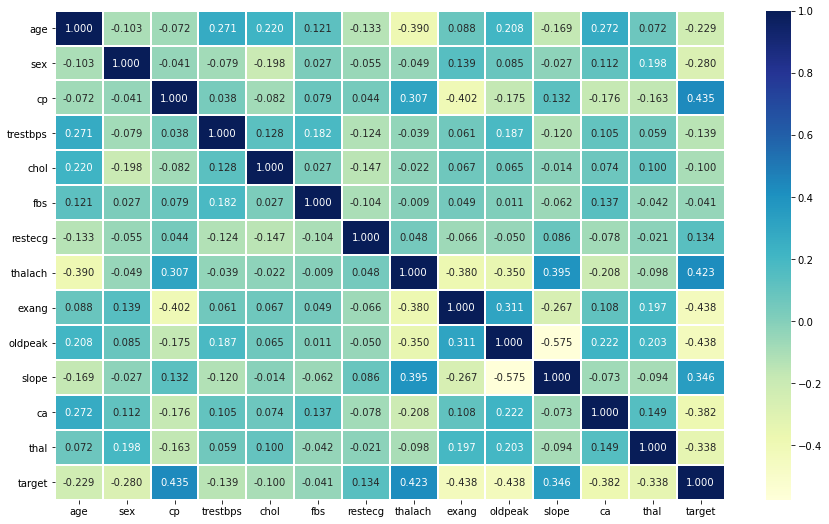

In [16]:
# Seaborn Heat Map
import seaborn as sns 
cor_matrix = df.corr()
plt.figure(figsize = (15,9))
sns.heatmap(cor_matrix, 
           annot = True,
           linewidth = 1,
            fmt= ".3f", 
            cmap="YlGnBu"
           )

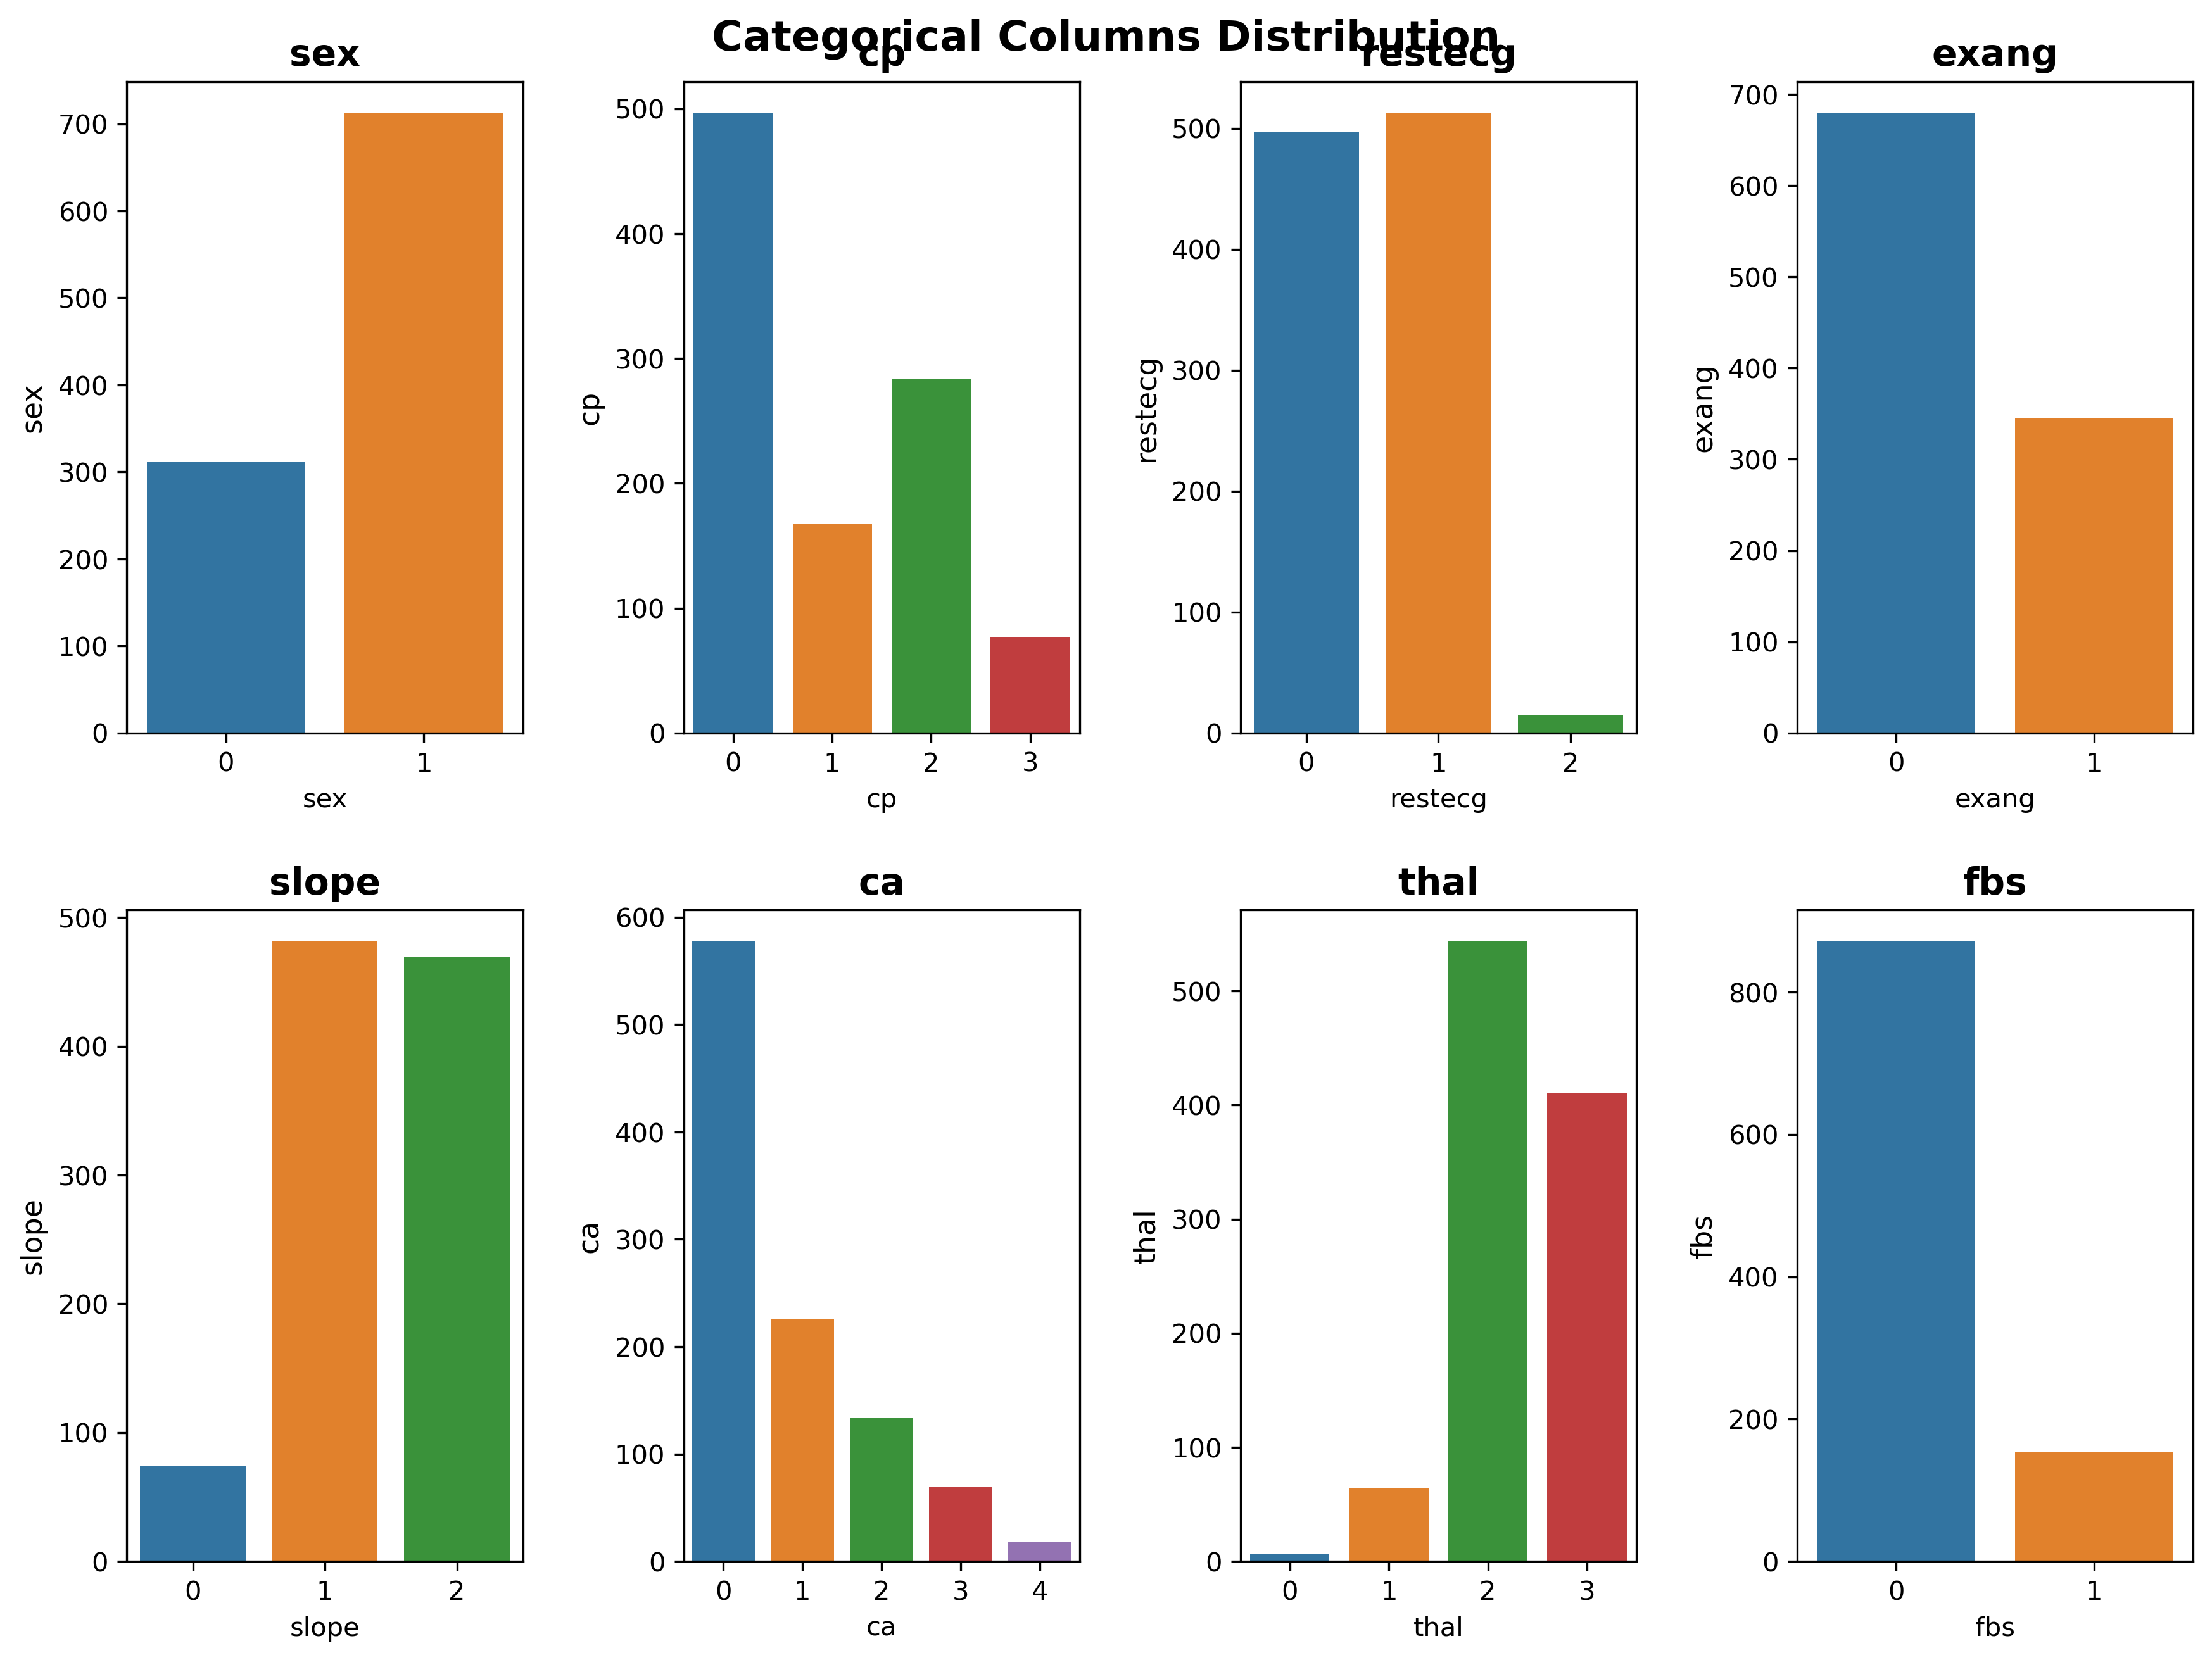

In [17]:
cols=['sex','cp','restecg','exang','slope','ca','thal','fbs']

fig=plt.figure(figsize=(12,9),dpi=300)

fig.suptitle('Categorical Columns Distribution', fontweight='bold', fontsize=16)

x=1

for i in range(len(cols)):
    fig.add_subplot(2, 4, i+1)
    plt.title(cols[i], fontweight='bold', fontsize=14)
    sns.countplot(data=df, x=cols[i], linewidth=2)
    plt.ylabel(cols[i], fontsize=11)
    
fig.tight_layout(pad=2.0)

# Data Preprocessing 

In [46]:
# Getting the target variable
y = df["target"]
X = df.drop('target',axis=1)

# Data Train , Test split with 80% for training and 20% for testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

# Scaler object for normalizing the input data to have zero mean and unit variance.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# eXtreme Gradient Boosting Model 

In [47]:
m1 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27, 
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)

# Set problematic attributes to None
new_attrs = ['grow_policy', 'max_bin', 'eval_metric', 'callbacks', 'early_stopping_rounds', 'max_cat_to_onehot', 'max_leaves', 'sampling_method' , 'feature_types', 'max_cat_threshold']
for attr in new_attrs:
    setattr(xgb, attr, None)

xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print('\033[1m' + "Accuracy on Testing Data:" + '\033[0m', xgb_acc_score*100, '\n')
print(classification_report(y_test,xgb_predicted))


[18:10:45] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
confussion matrix
[[ 89   9]
 [  2 105]]


Accuracy on Testing Data: 94.6341463414634 

              precision    recall  f1-score   support

           0       0.98      0.91      0.94        98
           1       0.92      0.98      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.94      0.95       205
weighted avg       0.95      0.95      0.95       205



# Inputing raw data

In [48]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# performing scalling 
input_data = scaler.transform(input_data_reshaped)

prediction = xgb.predict(input_data)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


# Saving the Model 

In [49]:
# Saving model as heart_disease_prediction.sav file 
filename = 'heart_disease_prediction.sav'
pickle.dump(xgb, open(filename, 'wb'))
pickle.dump(scaler, open('scaler_heart.sav', 'wb'))

# loading the saved model
loaded_model = pickle.load(open('heart_disease_prediction.sav', 'rb'))

# Printing the cols 
for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
